<a href="https://colab.research.google.com/github/Sandeep2111/Product_Recommendation/blob/main/Product_Recommendation_Engine_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Build a recommender engine that reviews customer ratings and purchase history to recommend items and improve sales. </u></b>

### Amazon.com is one of the largest electronic commerce and cloud computing companies.

### Just a few Amazon related facts:

### They lost $4.8 million in August 2013, when their website went down for 40 mins. They hold the patent on 1-Click buying, and licenses it to Apple. Their Phoenix fulfilment centre is a massive 1.2 million square feet. Amazon relies heavily on a Recommendation engine that reviews customer ratings and purchase history to recommend items and improve sales.


### This is a dataset related to over 2 Million customer reviews and ratings of Beauty related products sold on their website.

### It contains

* ### the unique UserId (Customer Identification),
* ### the product ASIN (Amazon's unique product identification code for each product),
* ### Ratings (ranging from 1-5 based on customer satisfaction) and
* ### the Timestamp of the rating (in UNIX time)

### This dataset contains product reviews and metadata from Amazon, including 142.8 million reviews spanning May 1996 - July 2014.

### This dataset includes reviews (ratings, text, helpfulness votes), product metadata (descriptions, category information, price, brand, and image features), and links (also viewed/also bought graphs).


## Steps:
1. Read and Explore the Given dataset.
2. Split the Data randomly into Train and test set.

#### Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
import warnings
import calendar
warnings.filterwarnings('ignore')

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone/Dataset/ratings_Beauty.csv')
dataset.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [ ]:
dataset.shape

(2023070, 4)

The dataset has more than 2 million records and 4 features.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [ ]:
#Find if the dataset contains any null values
dataset.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,2023070.0,4.149036e+00,1.311505e+00,1.0,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
Timestamp,2023070.0,1.360389e+09,4.611860e+07,908755200.0,1.350259e+09,1.372810e+09,1.391472e+09,1.406074e+09


* Minimum rating is `1` while the Maximum rating is `5`.
* We have a total of 2023070 Records
* Only 25% of the dataset falls between 1 to 4 rating
* 75% of the dataset is in the Range 4 to 5 rating

In [ ]:
#Converting timestamp to datetime Format.
dataset['Datetime'] = dataset['Timestamp'].apply(lambda x:datetime.fromtimestamp(x))
dataset.head()

,UserId,ProductId,Rating,Timestamp,Datetime
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200,2013-05-28
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200,2012-12-14
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200,2014-07-07
3,A1WMRR494NWEWV,0733001998,4.0,1382572800,2013-10-24
4,A3IAAVS479H7M7,0737104473,1.0,1274227200,2010-05-19


In [ ]:
dataset.tail()

,UserId,ProductId,Rating,Timestamp,Datetime
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000,2014-07-14
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000,2014-07-14
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400,2014-07-15
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200,2014-07-17
2023069,A1PB6OT0OOPKNQ,B00LU0LTOU,5.0,1405641600,2014-07-18


In [ ]:
dataset['day'] = dataset['Datetime'].dt.day
dataset['month'] = dataset['Datetime'].dt.month
dataset['year'] = dataset['Datetime'].dt.year

In [ ]:
dataset.head()

,UserId,ProductId,Rating,Timestamp,Datetime,day,month,year
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200,2013-05-28,28,5,2013
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200,2012-12-14,14,12,2012
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200,2014-07-07,7,7,2014
3,A1WMRR494NWEWV,0733001998,4.0,1382572800,2013-10-24,24,10,2013
4,A3IAAVS479H7M7,0737104473,1.0,1274227200,2010-05-19,19,5,2010


In [ ]:
#function for adding percentage on top of the count bars
def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()+20000
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

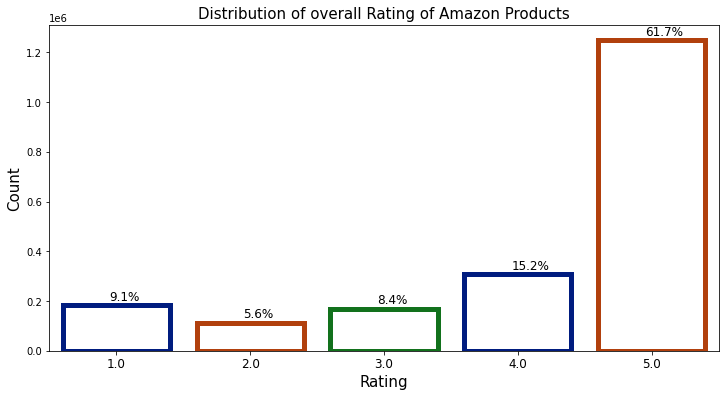

In [ ]:
#Finding the unique count of each kind of Rating
plt.figure(figsize=(12,6))
ax = sns.countplot(dataset['Rating'],edgecolor=sns.color_palette("dark", 3),facecolor = (0,0,0,0),linewidth = 5)
plt.xticks(size=12)
plt.xlabel('Rating',size=15)
plt.ylabel('Count',size=15)
plt.title('Distribution of overall Rating of Amazon Products',size=15)
without_hue(ax,dataset.Rating)
plt.show()

Text(0.5, 1.0, 'No of reviews over years')

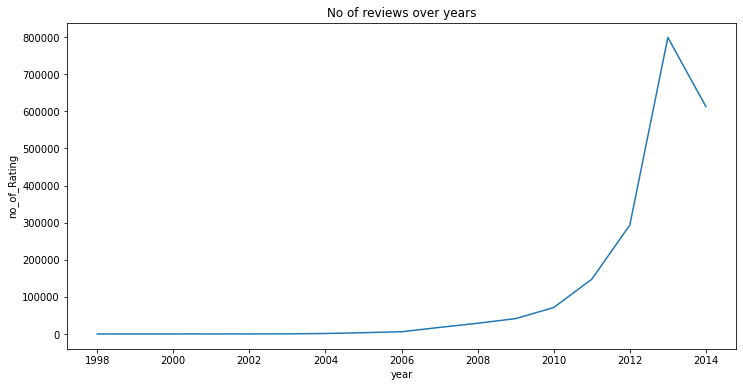

In [ ]:
# Number of reviews per year
plt.figure(figsize=(12,6))
yearly = dataset.groupby(['year'])['Rating'].count().reset_index()
yearly = yearly.rename(columns={'Rating':'no_of_Rating'})
yearChart = sns.lineplot(x='year',y='no_of_Rating',data=yearly)
yearChart.set_title('No of reviews over years')

* We can see that there is an increase in the trend from 2010 onwards. Which suggest that the number of users of amazon increased from 2010 and also users started rating the products.
* 

In [ ]:
yearly

,year,no_of_Rating
0,1998,2
1,1999,5
2,2000,16
3,2001,76
4,2002,163
5,2003,278
6,2004,1308
7,2005,3476
8,2006,5990
9,2007,17728


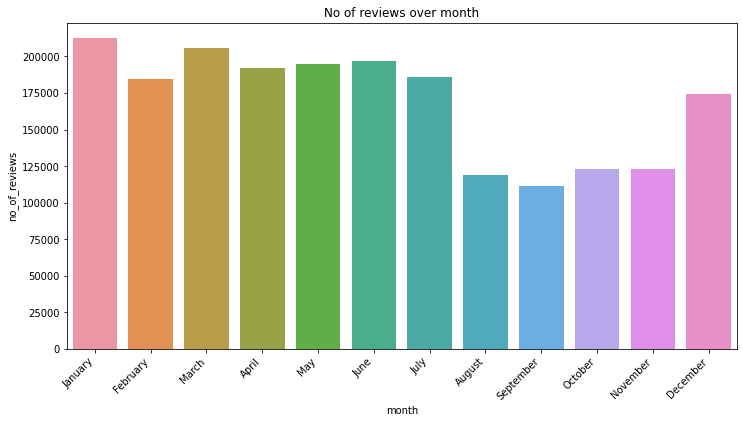

In [ ]:
#--- Monthly Reviews
plt.figure(figsize=(12,6))
monthly = dataset.groupby(['month'])['UserId'].count().reset_index()
monthly['month'] = monthly['month'].apply(lambda x : calendar.month_name[x])
monthly = monthly.rename(columns={'UserId':'no_of_reviews'})
monthChart = sns.barplot(x='month',y='no_of_reviews',data=monthly)
monthChart.set_title('No of reviews over month')
monthChart.set_xticklabels(monthChart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
plt.show()

In [ ]:
#Year wise count of Amazon products with particular rating
rating_1 = dataset[dataset['Rating']==1]
rating_2 = dataset[dataset['Rating']==2]
rating_3 = dataset[dataset['Rating']==3]
rating_4 = dataset[dataset['Rating']==4]
rating_5 = dataset[dataset['Rating']==5]

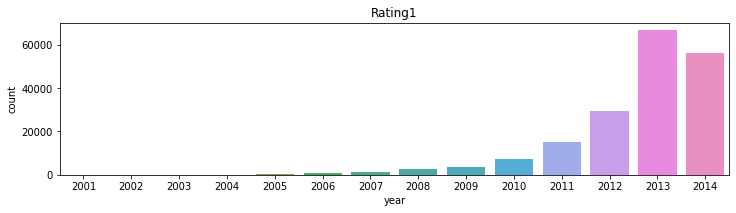

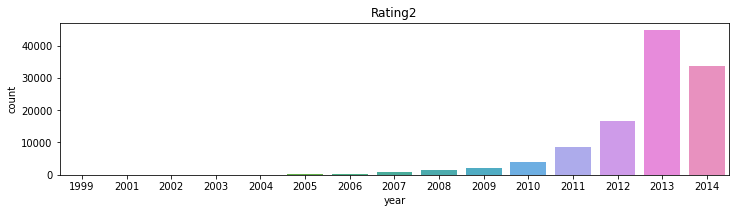

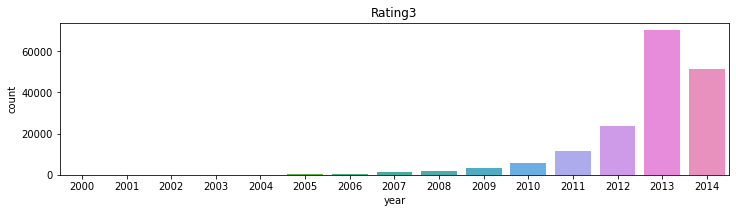

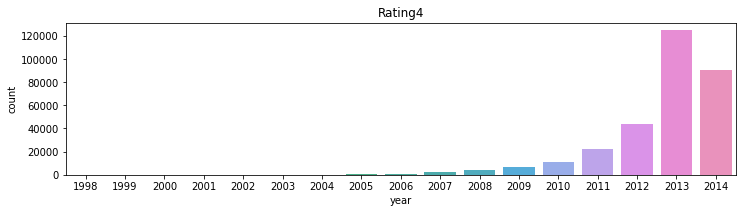

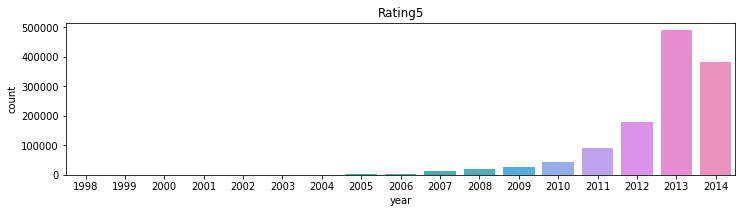

In [ ]:
ratings = [rating_1,rating_2,rating_3,rating_4,rating_5]
count=1
for rat in ratings:
  plt.figure(figsize=(12,2.8))
  sns.countplot(rat['year'])
  plt.title('Rating'+str(count))
  count+=1

* Number of products with ratings `1`,`2`,`3` is significantly less as compared with `4` and `5`. 
* Ratings with `1`,`2`,`3` is below 1 lakhs while the rating for `4` and `5` is above 5 Lakhs.
* From 2011 There is a raise in users providing rating which indicates that the users of amazon increased from 2011.

In [ ]:
#Most popular products by user
most_popular = dataset.groupby('ProductId')['Rating'].count().reset_index()
most_popular = most_popular.rename(columns={'Rating':'Counts'})
most_popular.sort_values(by='Counts',ascending=False,inplace=True)
top_20_most_popular = most_popular.head(20)

Text(0.5, 1.0, 'Top 20 most popular product by user')

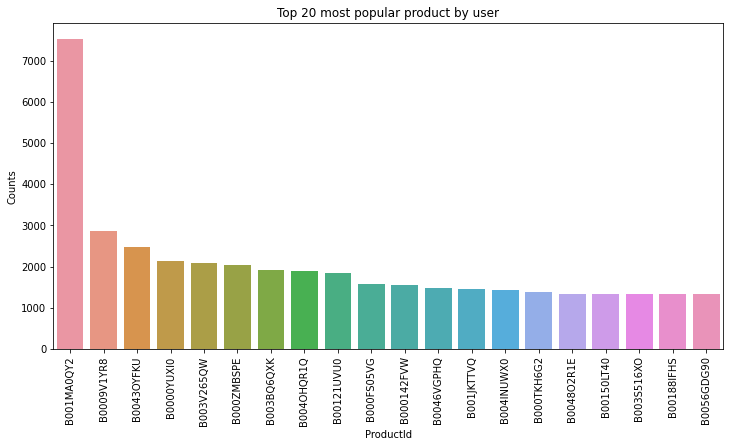

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 90)
sns.barplot(x=top_20_most_popular['ProductId'],y=top_20_most_popular['Counts'])
plt.title('Top 20 most popular product by user')

In [ ]:
top_20_most_popular

,ProductId,Counts
65766,B001MA0QY2,7533
10516,B0009V1YR8,2869
110873,B0043OYFKU,2477
2365,B0000YUXI0,2143
105018,B003V265QW,2088
41474,B000ZMBSPE,2041
94769,B003BQ6QXK,1918
124659,B004OHQR1Q,1885
43368,B00121UVU0,1838
17629,B000FS05VG,1589


In [ ]:
#Users who rated most number of prodcuts
most_popular_user = dataset.groupby('UserId')['Rating'].count().reset_index()
most_popular_user = most_popular_user.rename(columns={'Rating':'Counts'})
most_popular_user.sort_values(by='Counts',ascending=False,inplace=True)
most_popular_user.reset_index(inplace=True)
top_20_most_popular = most_popular_user.head(20)

Text(0.5, 1.0, 'Top 20 user who provided most number of Rating')

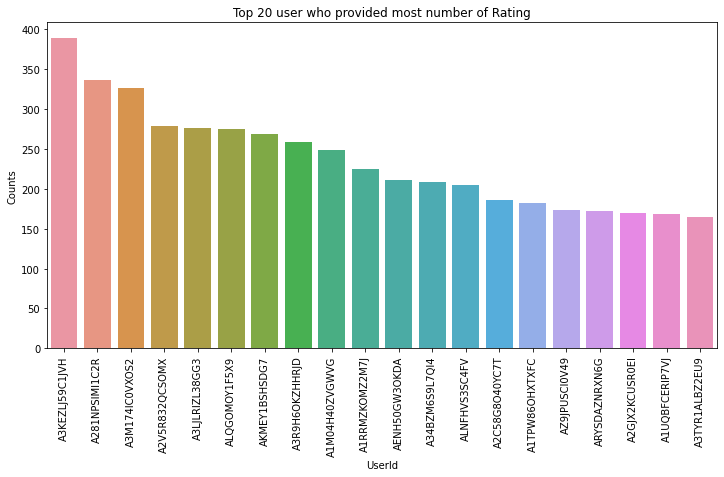

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 90)
sns.barplot(x=top_20_most_popular['UserId'],y=top_20_most_popular['Counts'])
plt.title('Top 20 user who provided most number of Rating')

In [ ]:
most_popular_user

,index,UserId,Counts
0,821601,A3KEZLJ59C1JVH,389
1,391642,A281NPSIMI1C2R,336
2,835886,A3M174IC0VXOS2,326
3,597619,A2V5R832QCSOMX,278
4,831533,A3LJLRIZL38GG3,276
...,...,...,...
1210266,464873,A2G8M8PDTN09UZ,1
1210267,464874,A2G8MAFIIQSJ42,1
1210268,464877,A2G8MTKRE6MV52,1
1210269,464879,A2G8MWBXG6JIY6,1


In [ ]:
(most_popular_user['Counts']>=5).sum()

52374

In [ ]:
#Number of unique users
print('Number of unique users are :', len(dataset['UserId'].unique()))

Number of unique users are : 1210271


In [ ]:
#Number of unique products
print('Number of unique products', len(dataset['ProductId'].unique()))

Number of unique products 249274


In [ ]:
#Unique Ratings
print('Unique Ratings', dataset['Rating'].unique())

Unique Ratings [5. 3. 4. 1. 2.]


In [ ]:
most_rated = dataset.groupby('UserId').size()

In [ ]:
most_rated.sort_values(ascending=False)

UserId
A3KEZLJ59C1JVH           389
A281NPSIMI1C2R           336
A3M174IC0VXOS2           326
A2V5R832QCSOMX           278
A3LJLRIZL38GG3           276
                        ... 
A3BQ47C773YMU1             1
A3BQ3Y37XL049D             1
A3BQ3NGQ3JJBR3             1
A3BQ3BW37JKZZ4             1
A00008821J0F472NDY6A2      1
Length: 1210271, dtype: int64

# Taking a subset of the data to make it less sparse

In [ ]:
#Group all the unique users
users = dataset.groupby('UserId').count()

In [ ]:
#Filter users who have rated 10 or more products
top_users = users[users['Rating']>=10].index
top_users

Index(['A00473363TJ8YSZ3YAGG9', 'A00700212KB3K0MVESPIY',
       'A0078719IR14X3NNUG0F', 'A01198201H0E3GHV2Z17I',
       'A02155413BVL8D0G7X6DN', 'A02734382TCW13I4YD1LE',
       'A029527620Q3SK5XW16RR', 'A03364251DGXSGA9PSR99',
       'A042274212BJJVOBS4Q85', 'A07739331MLU43RRRK661',
       ...
       'AZV2AG96CRJ26', 'AZV7CNMMJERKW', 'AZW9UD7Z7J0WL', 'AZWJAXOQMB8EK',
       'AZX1JTTIUYZX4', 'AZXP46IB63PU8', 'AZY3Z9QI0G8L', 'AZYA6NBTF2843',
       'AZZ91VNEU3XYX', 'AZZT1ERHBSNQ8'],
      dtype='object', name='UserId', length=12595)

In [ ]:
topuser_rating_df = dataset[dataset['UserId'].isin(top_users)]

In [ ]:
#Get only the UserId,ProductId and Rating columns
topuser_rating_df = topuser_rating_df[['UserId','ProductId','Rating']]
topuser_rating_df.head()

,UserId,ProductId,Rating
5,AKJHHD5VEH7VG,0762451459,5.0
6,A1BG8QW55XHN6U,1304139212,5.0
7,A22VW0P4VZHDE3,1304139220,5.0
10,A1BG8QW55XHN6U,130414643X,5.0
13,A22VW0P4VZHDE3,130414674X,5.0


In [ ]:
topuser_rating_df.shape

(222897, 3)

Here we can see that there are 222897 examples and 3 columns

###Keep data only for products that have 10 or more ratings

In [ ]:
products = dataset.groupby('ProductId').count()

In [ ]:
#Products which have been rated 10 or more times
top_products = products[products['Rating']>=10].index

In [ ]:
top_products

Index(['1304351475', '1403790965', '3227001381', '535795531X', '5357955948',
       '602260074X', '7535842801', '7806397051', '7899123011', '8096399322',
       ...
       'B00L6Q3BH6', 'B00L7BX4FE', 'B00L8JBNE4', 'B00LAOMUUS', 'B00LCE23JE',
       'B00LCEROA2', 'B00LG63DOM', 'B00LJEACWC', 'B00LLPT4HI', 'B00LNOKBYW'],
      dtype='object', name='ProductId', length=36938)

In [ ]:
top_rating_prod = dataset[dataset['ProductId'].isin(top_products)]

In [ ]:
top_rating_prod

,UserId,ProductId,Rating,Timestamp,Datetime,day,month,year
26,A1RXI3A1E99112,1304351475,5.0,1405296000,2014-07-14,14,7,2014
27,A26QL1FBQO9C0E,1304351475,5.0,1392076800,2014-02-11,11,2,2014
28,A19KEEVZYO1KO6,1304351475,4.0,1388707200,2014-01-03,3,1,2014
29,A1F6HRR58TQ2R0,1304351475,5.0,1394928000,2014-03-16,16,3,2014
30,AVQP6PO1NK0IJ,1304351475,1.0,1389657600,2014-01-14,14,1,2014
...,...,...,...,...,...,...,...,...
2023060,A3EN0JCMEML724,B00LNOKBYW,5.0,1405641600,2014-07-18,18,7,2014
2023061,A1RYQPQ01T5D5R,B00LNOKBYW,5.0,1406073600,2014-07-23,23,7,2014
2023062,A3MQDRRGC9070R,B00LNOKBYW,5.0,1405987200,2014-07-22,22,7,2014
2023063,A2LB743IV4NS2W,B00LNOKBYW,5.0,1405555200,2014-07-17,17,7,2014


In [ ]:
top_rating_prod.sort_values(by='Rating',ascending=False,inplace=True)

In [ ]:
top_rating_prod = top_rating_prod[['UserId','ProductId','Rating']]
top_rating_prod.head()

,UserId,ProductId,Rating
26,A1RXI3A1E99112,1304351475,5.0
1096911,A1K6K1P4L1FE8M,B003TBPG5G,5.0
1096968,A3SOUMZ4H9JK80,B003TDZFVE,5.0
1096967,AN5K6D8W8RGSG,B003TDZFVE,5.0
1096963,A2X9RBK2ZP2M3Z,B003TDZFVE,5.0


In [ ]:
#Split the data randomly into train and test dataset
from sklearn.model_selection import train_test_split

train_data,test_data = train_test_split(top_rating_prod,test_size=0.2,random_state=10)

In [ ]:
train_data.head()

,UserId,ProductId,Rating
1570538,AXDENGAX9KXGB,B007C7IVE6,3.0
364883,A15HJ8E4NQX8FN,B000P0IDYU,4.0
77105,A1NUIC8FYVAC22,B00021DTEG,5.0
494779,A3I0CZ6OJ4DUWM,B000ZMBSPE,5.0
806756,A14PYXBHMV8PMJ,B0020MMFZ4,5.0


In [ ]:
test_data.head()

,UserId,ProductId,Rating
1563012,AXRMB1697C1MY,B0078DXKLI,5.0
875292,ABFUIZW6PAJNK,B002K8W1UC,5.0
2493,APHQQF9BJP75U,B00004TMFE,3.0
149250,AA2AK65VS2VYD,B0009OAHJG,5.0
1456740,A2CFU25A4MQ4Z3,B005WQB6G4,2.0


## Building Popularity Recomender model

In [ ]:
#Building the recommendations based on the average of all user ratings for each product.
recomendation_train_data = train_data.groupby('ProductId').mean().reset_index()

In [ ]:
recomendation_train_data.head()

,ProductId,Rating
0,1304351475,3.083333
1,1403790965,4.888889
2,3227001381,4.473684
3,535795531X,4.800000
4,5357955948,4.500000


In [ ]:
recomendation_train_data_sort = recomendation_train_data.sort_values(['Rating','ProductId'],ascending=False)

In [ ]:
recomendation_train_data_sort.head()

,ProductId,Rating
36937,B00LNOKBYW,5.0
36935,B00LJEACWC,5.0
36933,B00LCEROA2,5.0
36927,B00L5KTZ0K,5.0
36924,B00L5BXG36,5.0


In [ ]:
ratings_mean_count = pd.DataFrame(train_data.groupby('ProductId')['Rating'].mean())

In [ ]:
ratings_mean_count

,Rating
ProductId,
1304351475,3.083333
1403790965,4.888889
3227001381,4.473684
535795531X,4.800000
5357955948,4.500000
...,...
B00LCEROA2,5.000000
B00LG63DOM,4.900000
B00LJEACWC,5.000000


In [ ]:
ratings_mean_count['rating_counts'] = pd.DataFrame(train_data.groupby('ProductId')['Rating'].count())

In [ ]:
ratings_mean_count.head()

,Rating,rating_counts
ProductId,,
1304351475,3.083333,12
1403790965,4.888889,9
3227001381,4.473684,19
535795531X,4.800000,10
5357955948,4.500000,8


In [ ]:
pred_df = test_data[['UserId', 'ProductId', 'Rating']]

In [ ]:
pred_df.rename(columns = {'Rating' : 'true_ratings'}, inplace=True)

In [ ]:
pred_df = pred_df.merge(recomendation_train_data_sort, left_on='ProductId', right_on = 'ProductId')

In [ ]:
pred_df.head()

,UserId,ProductId,true_ratings,Rating
0,AXRMB1697C1MY,B0078DXKLI,5.0,3.562500
1,A43SU2MFB7LX8,B0078DXKLI,4.0,3.562500
2,ABFUIZW6PAJNK,B002K8W1UC,5.0,4.113636
3,A357E2DE2FBLS9,B002K8W1UC,5.0,4.113636
4,A3MQEP2Z1VVQB9,B002K8W1UC,3.0,4.113636


In [ ]:
pred_df.rename(columns = {'Rating' : 'predicted_ratings'}, inplace = True)

In [ ]:
pred_df.head()

,UserId,ProductId,true_ratings,predicted_ratings
0,AXRMB1697C1MY,B0078DXKLI,5.0,3.562500
1,A43SU2MFB7LX8,B0078DXKLI,4.0,3.562500
2,ABFUIZW6PAJNK,B002K8W1UC,5.0,4.113636
3,A357E2DE2FBLS9,B002K8W1UC,5.0,4.113636
4,A3MQEP2Z1VVQB9,B002K8W1UC,3.0,4.113636


In [ ]:
import sklearn.metrics as metric
from math import sqrt
MSE = metric.mean_squared_error(pred_df['true_ratings'], pred_df['predicted_ratings'])
print('The RMSE value for Popularity Recommender model is', sqrt(MSE))

The RMSE value for Popularity Recommender model is 1.2521752276549172


# Collaborative Filtering Model

In [ ]:
! pip install surprise

     |████████████████████████████████| 11.8MB 26.6MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617613 sha256=eb35bb7a35e595c84476ae9fa2d5f23ef58442d0709eb4acf7885db754ccd6a7
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [ ]:
import surprise
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import KNNBasic, SVD, NormalPredictor, KNNBaseline,KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering, Reader, dataset, accuracy

In [ ]:
reader = Reader(rating_scale=(0.5,5.0))

###Converting Pandas Dataframe to Surpise format

In [ ]:
data = Dataset.load_from_df(topuser_rating_df[['UserId', 'ProductId', 'Rating']],reader)

In [ ]:
# Split data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.3,random_state=0)

##Training the model

In [ ]:
algo_user = KNNWithMeans(k=10, min_k=6, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_user.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


##SVD

In [ ]:
svd_model = SVD(n_factors=50,reg_all=0.02)
svd_model.fit(trainset)

###Evaluate both the models. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models

In [ ]:
MSE = metric.mean_squared_error(pred_df['true_ratings'], pred_df['predicted_ratings'])
print('The RMSE value for Popularity Recommender model is', sqrt(MSE))

The RMSE value for Popularity Recommender model is 1.2521752276549172


In [ ]:
print(len(testset))
print(type(testset))

66870
<class 'list'>


In [ ]:
#KNNWithMeans
test_pred = algo_user.test(testset)

In [ ]:
test_pred[0]

Prediction(uid='ADMPGWBF0BC9W', iid='B004TSF996', r_ui=3.0, est=4.5625, details={'actual_k': 0, 'was_impossible': False})

In [ ]:
accuracy.rmse(test_pred)

RMSE: 1.1466


1.1466422079110423

In [ ]:
#SVD

test_pred = svd_model.test(testset)

# compute RMSE
accuracy.rmse(test_pred)

RMSE: 1.1032


1.1031770158164882

###Parameter tuning of SVD Recommendation system

In [ ]:
from surprise.model_selection import GridSearchCV
param_grid = {'n_factors' : [5,10,15], "reg_all":[0.01,0.02]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3,refit = True)

In [ ]:
gs.fit(data)

In [ ]:
# get best parameters
gs.best_params

{'rmse': {'n_factors': 5, 'reg_all': 0.02}}

In [ ]:
gs.test(testset)
accuracy.rmse(gs.test(testset))

RMSE: 0.9615


0.9614942450330478

##### The RMSE value for Collaborative Filtering model, byKNNWithMeans is 1.1466 and SVD is 1.1032. After parameter tuning of SVD it is 0.9615

### Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.

In [ ]:
from collections import defaultdict
def get_top_n(predictions, n=5):
  
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [ ]:
top_n = get_top_n(test_pred, n=5)

In [ ]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

In [ ]:
#Print first 20 Recommendation
for uid, user_ratings in take(20,top_n.items()):
    print(uid, [iid for (iid, _) in user_ratings])

ADMPGWBF0BC9W ['B004TSF8R4', 'B000NIY7QM', 'B005OZFV50', 'B002B4GGUG', 'B005OZDYCW']
A3CQ6DAU7A8F5Y ['B00BCHGD6K', 'B0092JXYXA', 'B00EO9UIP0', 'B00DQ48IC4', 'B004MGRF0G']
A1TR1R2QKWRSRA ['B0020122ZS', 'B009YSSLAU', 'B008U2Y9BQ', 'B00HSNWXVQ', 'B00AE07BDU']
AA71MQ3FJV5VX ['B008U1Q4DI', 'B0089VD8WO', 'B00AH4TJHE', 'B0086LC16Q', 'B004LQGSU0']
AVJJ2D4G5I0Z4 ['B001LF4G6W', 'B001EWET8W', 'B0017QT5UM', 'B0017QNO1S', 'B00106AC06']
A1JN5YHKWAO2IN ['B0012HPB5E', 'B002ER1BZK', 'B0013Y73FW', 'B0000535RC', 'B004D24818']
A3BT8W6XK7XOD6 ['B000052YE1', 'B000NNKAFE', 'B000UYC8YW', 'B0009EXMB6']
A19JOB1L14QF9Z ['B003RSY1NE', 'B000A3XHHK', 'B008D5I61Y', 'B002Y2WJUG', 'B004DBVPVK']
A2M8T1C3YP19NQ ['B0099189P4', 'B00BIQM2LU', 'B003FBI9LS']
A3CGXO38ILDT0D ['B00028MLG6', 'B001KPSO5M', 'B0000AXZV5', 'B002R0ECOQ', 'B0090UJFYI']
A330PQAR1XWTXB ['B003UM6TJG', 'B005KCAGEI', 'B005BF1M10', 'B0075ALW9Q', 'B0013QN5TI']
A2R1HUYHXV7H18 ['B007RT19V6', 'B00IP42FBA', 'B004N7DQHA', 'B004GIM68G', 'B00ISW92F6']
A3Q57F5ROZTEQ